In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Q1
pd.__version__

'1.4.4'

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-17 23:33:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 1423529 (1,4M) [text/plain]
Сохранение в: «housing.csv»

housing.csv         100%[===================>]   1,36M  1,52MB/s    за 0,9s    

2023-09-17 23:33:06 (1,52 MB/s) - «housing.csv» сохранён [1423529/1423529]



In [4]:
df = pd.read_csv('../housing.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Q2
len(df.columns)

10

In [6]:
# Q3
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Q4
len(df.ocean_proximity.unique())

5

In [8]:
# Q5
df.loc[df.ocean_proximity == 'NEAR BAY']['median_house_value'].mean()

259212.31179039303

In [9]:
# Q6
# 1. Calculate the average of `total_bedrooms` column in the dataset.
# 2. Use the `fillna` method to fill the missing values in `total_bedrooms` with the mean value from the previous step.
# 3. Now, calculate the average of `total_bedrooms` again.
# 4. Has it changed?

mean = df.total_bedrooms.mean()
df.total_bedrooms.fillna(mean, inplace=True)
new_mean = df.total_bedrooms.mean()
print(mean, new_mean)

537.8705525375618 537.8705525375639


In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Q7
# 1. Select all the options located on islands.
# 2. Select only columns `housing_median_age`, `total_rooms`, `total_bedrooms`.
# 3. Get the underlying NumPy array. Let's call it `X`.
# 4. Compute matrix-matrix multiplication between the transpose of `X` and `X`. To get the transpose, use `X.T`. Let's call the result `XTX`.
# 5. Compute the inverse of `XTX`.
# 6. Create an array `y` with values `[950, 1300, 800, 1000, 1300]`.
# 7. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
# 8. What's the value of the last element of `w`?

# 1
df_islands = df.loc[df.ocean_proximity == 'ISLAND']
# 2
df_islands = df_islands[['housing_median_age', 'total_rooms', 'total_bedrooms']]
# 3
X = df_islands.values
# 4
XTX = X.T.dot(X)
# 5
XTX_inv = np.linalg.inv(XTX)
# 6
y = np.array([950, 1300, 800, 1000, 1300])
# 7
w = XTX_inv.dot(X.T).dot(y)
# 8
print(w[-1])

5.699229455065594


In [24]:
# Plot a linear regression line with `w` as the slope and `y` as the intercept.

# predictions = X.dot(w)
# plt.scatter(y, c='r')
line

[622.8481176957002,
 1200.9308579995013,
 1200.9308579995013,
 1200.9308579995013,
 669.0947369200044]

In [27]:
w

array([23.12330961, -1.48124183,  5.69922946])

In [19]:
predictions

array([1112.54783634, 1076.40722513,  969.8162033 , 1231.69181089,
        829.64193013])

In [15]:
y

array([ 950, 1300,  800, 1000, 1300])

In [14]:
w

array([23.12330961, -1.48124183,  5.69922946])

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

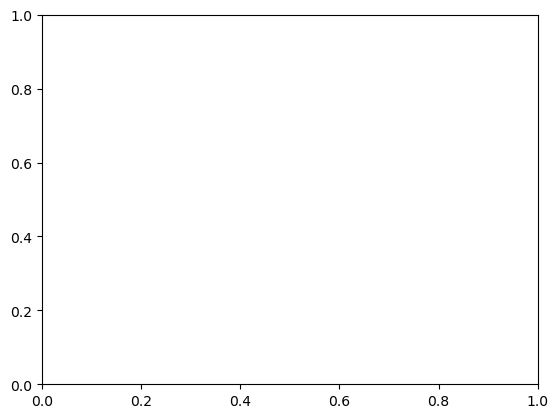

In [13]:
# Plot a linear regression line with `w` as the slope and `y` as the intercept.

plt.plot(y